In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class moon_data_class(object):
  def __init__(self,N,dist,r,w):
    self.N=N
    self.w=w      
    self.dist=dist
    self.r=r
  
  #def NN_perceptron(self):
  #  num_neuron=2
  #  dist=self.dist
  #  b=dist/2 # bias
    
  #  w=np.zeros(2)
  #  w=np.hstack((b,w)) # weights b and w1,w2
    
  #  shuffle_seq=np.random.randint(0,num_tr-1,num_tr)
  #  data_shuffle_tr=data_shuffled[:,shuffle_seq]
  #  addone=np.ones(num_tr)
  #  data_shuffle_tr=np.vstack((addone,data_shuffle_tr))
    
  # for epoch_num in range (0,epochs):
  #    eta=0.9*0.95^epoch_num   # learning rate decay
  #    for i in range (1,num_tr):
  #      x=data_shuffle_tr[0:3,i]
  #      d=data_shuffle_tr[3,i]
  #      y=self.sgn(dot(w,x))
  #      error[i]=d-y
  #      w_update=w+eta*error[i]*x##
    
  def sgn(self,x):  # sgn function
    if(x>0):
      return 1;
    else:
      return -1;  
        
  def dbmoon(self): # doublemoon function
    N = self.N
    r = self.r
    w = self.w
    dist = self.dist
    
    np.random.seed(123) 
    aa=np.random.random((2,N//2)) # use / 'float' object cannot be interpreted as an integer
    radius=(r-w//2)+ w*aa[0,:]
    theta=np.pi*aa[1,:]
    
    x1= radius * np.cos(theta)
    y1= radius * np.sin(theta)
    labela=np.ones(N//2)
    ca=np.vstack((x1,y1,labela))
    
    x2= radius * np.cos(-theta) + r
    y2= radius * np.sin(-theta) - dist
    labelb= -1*np.ones(N//2)
    cb=np.vstack((x2,y2,labelb))
    
    data= np.hstack((ca,cb))
    
    shuffle_sequence=np.random.randint(0,N-1,N)
    data=data[:,shuffle_sequence]
    
    return data


In [0]:
# set the parameters
num_tr=1000 # training samples 1000
num_te=2000 # testing samples 2000
N=num_tr+num_te # total number of samples 3000
epochs=50 
dist = 0
r = 10.0
w = 6.0

# create an real instance of the moon_data_class named data_source
data_source = moon_data_class(N, dist, r, w)
data_shuffled = data_source.dbmoon()

In [0]:
num_neuron=2
b=0   # bias
mse_arr=np.array([]) # create an empty array to store mse array
    
w=np.zeros(2) # initial the weight array
w=np.hstack((b,w)) # new weights [b,w1,w2]

np.random.seed(123)
index=np.array(range(N))
ix_tr=index[0:num_tr]    # get the shuffled data from index 0 to 999 for training
np.random.shuffle(ix_tr) # shuffle again for the 1000 samples
ix_te=index[num_tr:N]    # get the shuffled data from index 1000 to 2999 for testing
np.random.shuffle(ix_te) # shuffle again for the 2000 samples 

#shuffle_seq_tr=np.random.randint(0,num_tr-1,num_tr)

data_shuffle_tr=data_shuffled[:,ix_tr]  # get the training dataset
addone=np.ones(num_tr)
data_shuffle_tr=np.vstack((addone,data_shuffle_tr)) # add one row of 1 to the trainig dataset

for epoch_num in range (epochs):
  eta=0.9 * 0.95 ** epoch_num   # learning rate decay
  square_error=0
  for i in range (num_tr):
    x=data_shuffle_tr[0:3,i] # use the first three rows to calculate 
    d=data_shuffle_tr[3,i] # the last row is labels
    y=data_source.sgn(np.dot(w,x))
    error=d-y
    w= w + eta*error*x
    square_error+=(d-y)**2
    
  mse=square_error/num_tr  # mean square error
  mse_arr=np.append(mse_arr,mse) # for every epoch, collect the mse

print(mse_arr) # all the mse for 50 epochs

[0.148 0.068 0.064 0.06  0.036 0.048 0.024 0.024 0.04  0.012 0.032 0.032
 0.012 0.008 0.008 0.02  0.02  0.008 0.008 0.02  0.008 0.008 0.008 0.02
 0.008 0.008 0.008 0.02  0.008 0.004 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]


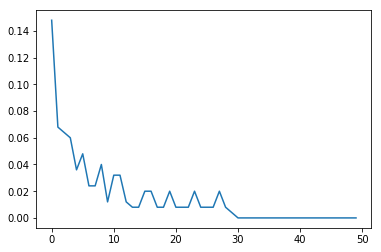

In [0]:
plt.plot(mse_arr)
plt.show()

In [0]:
# testing data preparation
data_shuffle_te=data_shuffled[:,ix_te]
addone=np.ones(num_te)
data_shuffle_te=np.vstack((addone,data_shuffle_te))
square_error=0
data_wrong=np.array([])

for i in range (num_te):
    x=data_shuffle_te[0:3,i]
    d=data_shuffle_te[3,i]
    y=data_source.sgn(np.dot(w,x))
    error=d-y
    w= w + eta*error*x
    square_error+=(d-y)**2
    
    if y != d:
      data_wrong=np.append(data_wrong,i) # record if there are something wrong
      
mse=square_error/num_te    
print(mse)
print(data_wrong)

0.006
[ 178.  923. 1462.]


In [0]:
data_shuffled.shape

(3, 3000)

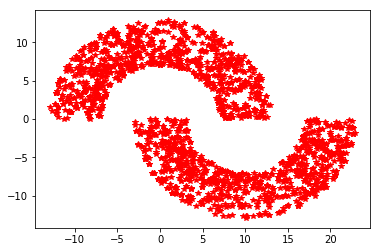

In [0]:
plt.plot(data_shuffled[0,ix_te], data_shuffled[1,ix_te], 'r*')
plt.show()

# ***perceptron for iris***

In [0]:
from google.colab import drive # coonect to my private google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
iris=pd.read_csv('Colab Notebooks/iris.csv') 
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
#iris=pd.DataFrame(iris,columns=['names','sex','age'],index=['11','22','33'])
#iris=iris[class='Iris-setosa'|class='Iris-virginica']
iris_setosa= iris.loc[0:49] # get the 50 Iris-setosa samples from the dataframe 
iris_setosa['label']= 1  # create a new column label that should be 1
iris_virginica= iris.loc[100:149] # get the 50 Iris-virginica samples from the dataframe
iris_virginica['label']= -1 # give them label -1
iris_2class=pd.concat([iris_setosa,iris_virginica])  # concat them together after labeling
iris_2class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,sepal_length,sepal_width,petal_length,petal_width,class,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [0]:
iris_arr=iris_2class.values # transform the dataframe to 2-dim array
iris_arr.shape

(100, 6)

In [0]:
# split the train and test dataset
# y_train is the array of labels for training 
# y_test is the array of labels for testing
# 60 samples for training and 40 for testing 
x_train, x_test, y_train, y_test = train_test_split(iris_arr[:,0:4], 
                                                    iris_arr[:,5], 
                                                    test_size=0.4,
                                                    shuffle=True, 
                                                    random_state=12)
x_train.shape


(60, 4)

In [0]:
# 4 input neurons
epochs=50
b=0   # bias
num_tr=60
mse_arr=np.array([])
    
w=np.zeros(4)
w=np.hstack((b,w)) # new weights b and w1,w2
addone=np.ones(num_tr)
x_tr=np.column_stack((addone,x_train))  # add one row of 1 to the trainig dataset

# the perceptron algorithm
for epoch_num in range (epochs):
  eta=0.9 * 0.95 ** epoch_num   # learning rate decay
  square_error=0
  for i in range (num_tr):
    x=x_tr[i,:]
    d=y_train[i]
    y=data_source.sgn(np.dot(w,x.T))
    error=d-y
    w = w+eta*error*x
    square_error+=(d-y)**2
    
  mse=square_error/num_tr
  mse_arr=np.append(mse_arr,mse)
print(mse_arr)
print(w) # the updated weights
num_te=40

[0.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[1.8 1.62 7.740000000000001 -11.52 -5.22]


In [0]:
# the testing process
num_te=40
addone=np.ones(num_te)
x_te=np.column_stack((addone,x_test))
data_wrong=np.array([])
for i in range (num_te):
    x=x_te[i,:]
    d=y_test[i]
    y=data_source.sgn(np.dot(w,x.T))
    error=d-y
    w= w + eta*error*x
    square_error+=(d-y)**2    
    if y != d:
      data_wrong=np.append(data_wrong,i)
      
mse=square_error/num_te    
print(mse)
print(data_wrong)

0.0
[]
